# Recognizing one 7 segment display digit
### input are values of 7 segments of the digital display. Output is a binary representation of the number shown.
![7 segment display to binary](7 to BCD.png "task at hand")

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from IPython.display import SVG

input and output data

In [5]:
zer = [1,1,1,1,1,1,0]
one = [0,1,1,0,0,0,0]
two = [1,1,0,1,1,0,1]
thr = [1,1,1,1,0,0,1]
fou = [0,1,1,0,0,1,1]
fiv = [1,0,1,1,0,1,1]
six = [1,0,1,1,1,1,1]
sev = [1,1,1,0,0,0,0]
eig = [1,1,1,1,1,1,1]
nin = [1,1,1,1,0,1,1]
eij = [1,1,1,0,1,1,1] #A
bee = [0,0,1,1,1,1,1] #b
see = [1,0,0,1,1,1,0] #C
dee = [0,1,1,1,1,0,1] #d
eee = [1,0,0,1,1,1,1] #E
eff = [1,0,0,0,1,1,1] #F
inp=[zer, one, two, thr, fou, fiv, six, sev, eig, nin, eij, bee, see, dee, eee, eff]
out=[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]]

X_df=pd.DataFrame(inp,columns=['l1','l2','l3','l4','l5','l6','l7'])
X_df
Y_df=pd.DataFrame(out,columns=['b0','b1','b2','b3'])
Y_df
print(X_df.shape, Y_df.shape)
X=X_df.values
Y=Y_df.values

(16, 7) (16, 4)


#### NN model

In [15]:
model = Sequential()
L1=Dense( units=7, input_shape=(7,), activation='relu')
model.add(L1)
L2=Dense(units=4, activation='sigmoid') # relu
model.add(L2)
model.compile(loss='mse',optimizer='rmsprop', metrics=['accuracy'])
my_sgd = optimizers.SGD(lr=0.01, momentum=0.5, decay=0.1, nesterov=True)


#model.add(Dense( units=7, input_shape=(7,), activation='relu'))
#model.add(BatchNormalization())
#model.add(model.add(lambda(rectifier)))

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mse', optimizer='adagrad', metrics=['accuracy'])
#model.compile(loss='mse',optimizer='sgd', metrics=['binary_accuracy'])

#### training

In [16]:
epochs=5000
hist = model.fit(X, Y, epochs=epochs,  verbose=0, shuffle=True) #batch_size=5,

#### Check how fast it converged

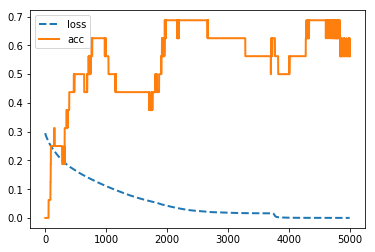

In [17]:
x = np.linspace(0,epochs-1,epochs)
plt.plot(x, hist.history['loss'], '--', linewidth=2, label='loss')
plt.plot(x, hist.history['acc'], '-', linewidth=2, label='acc')
plt.legend()
plt.show()

#### Final loss and accuracy

In [18]:
loss_and_metrics = model.evaluate(X, Y)
print(loss_and_metrics)

16/16 [==============================] - 0s
[2.7387422960600816e-05, 0.5625]


#### Print out weights

In [19]:
L1.get_weights()
L2.get_weights()

[array([[ 3.25912213,  3.79286122,  3.75771189,  3.34451151],
        [-3.54982948, -4.30660915,  2.80844164,  5.21830559],
        [-4.66096544,  4.65326405, -3.38997197, -2.98808169],
        [-1.37400985, -4.42106819,  2.66241932, -5.46372938],
        [ 1.93589485, -5.06448984, -4.47617674, -2.62029123],
        [-2.65894675, -2.63501334,  4.23232746,  4.62428427],
        [-4.8769927 ,  4.46456623, -4.85717583, -1.35408068]], dtype=float32),
 array([ 4.74995184,  3.77547717, -3.56559896,  4.46597385], dtype=float32)]

#### See if there is a problem with any character

In [23]:
pred = model.predict(inp)
for co,i in enumerate(pred):
    c=[]
    for j in i:
        if j>0.5: c.append(1)
        else: c.append(0)
    if c==out[co]: 
        st="Yay!"
    else:
        st="Nay"
    print(["{0:0.2f}".format(n) for n in i], c, out[co], st)

['0.00', '0.00', '0.00', '0.00'] [0, 0, 0, 0] [0, 0, 0, 0] Yay!
['0.00', '0.01', '0.00', '1.00'] [0, 0, 0, 1] [0, 0, 0, 1] Yay!
['0.00', '0.00', '1.00', '0.00'] [0, 0, 1, 0] [0, 0, 1, 0] Yay!
['0.00', '0.00', '1.00', '1.00'] [0, 0, 1, 1] [0, 0, 1, 1] Yay!
['0.00', '1.00', '0.00', '0.00'] [0, 1, 0, 0] [0, 1, 0, 0] Yay!
['0.00', '1.00', '0.00', '1.00'] [0, 1, 0, 1] [0, 1, 0, 1] Yay!
['0.00', '1.00', '1.00', '0.00'] [0, 1, 1, 0] [0, 1, 1, 0] Yay!
['0.00', '1.00', '1.00', '1.00'] [0, 1, 1, 1] [0, 1, 1, 1] Yay!
['0.99', '0.00', '0.00', '0.00'] [1, 0, 0, 0] [1, 0, 0, 0] Yay!
['0.99', '0.00', '0.00', '1.00'] [1, 0, 0, 1] [1, 0, 0, 1] Yay!
['1.00', '0.00', '1.00', '0.00'] [1, 0, 1, 0] [1, 0, 1, 0] Yay!
['1.00', '0.00', '1.00', '1.00'] [1, 0, 1, 1] [1, 0, 1, 1] Yay!
['1.00', '1.00', '0.00', '0.00'] [1, 1, 0, 0] [1, 1, 0, 0] Yay!
['0.99', '0.98', '0.03', '0.99'] [1, 1, 0, 1] [1, 1, 0, 1] Yay!
['1.00', '1.00', '1.00', '0.00'] [1, 1, 1, 0] [1, 1, 1, 0] Yay!
['1.00', '1.00', '1.00', '1.00'] [1, 1, 